In [73]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [74]:
df = pd.read_csv("Data/genres_v2.csv")

df = df.drop(columns=['type', 'id', 'uri', 'track_href','analysis_url', 'song_name','Unnamed: 0','title', 'duration_ms','time_signature'])

df['genre'] = df['genre'].replace(['Dark Trap', 'Rap', 'Pop', 'Hiphop', 'Trap Metal', 'RnB', 'techno', 'trance', 'hardstyle', 'Underground Rap', 'dnb', 'psytrance', 'Emo', 'trap', 'techhouse'],
                                  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])


C:\Users\Matin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [75]:
df["key"] = (df["key"] / df["key"].max())
df["tempo"] = (df["tempo"] / df["tempo"].max())
df["loudness"] = (df["loudness"] / df["loudness"].min())

In [76]:

raw_data = pd.read_csv("Data/genres_v2.csv")
spotify_data = raw_data[['danceability', 
                         'energy', 
                         'speechiness',
                         'acousticness',
                         'instrumentalness', 
                         'liveness','tempo',
                         'duration_ms',
                         'genre',
                         'song_name',
                         'loudness',
                         'valence',
                         'key']
                       ].copy()


white_df = spotify_data[spotify_data["song_name"].notna()]

In [77]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
# matplotlib.rcParams['figure.facecolor'] = '#0000000'

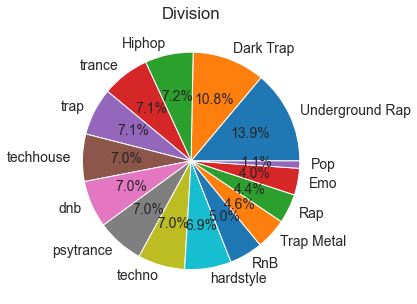

In [78]:
genre_count= spotify_data.genre.value_counts()

plt.title("Division")
plt.pie(genre_count, labels = genre_count.index, autopct='%1.1f%%');

In [79]:
dance_genre = spotify_data.groupby("genre")[["danceability"]].mean().sort_values("danceability",ascending=False)
dance_genre

,danceability
genre,
techhouse,0.786794
Underground Rap,0.744658
Rap,0.742877
techno,0.715742
Hiphop,0.698982
Pop,0.676807
RnB,0.674206
Trap Metal,0.647564
Dark Trap,0.618834


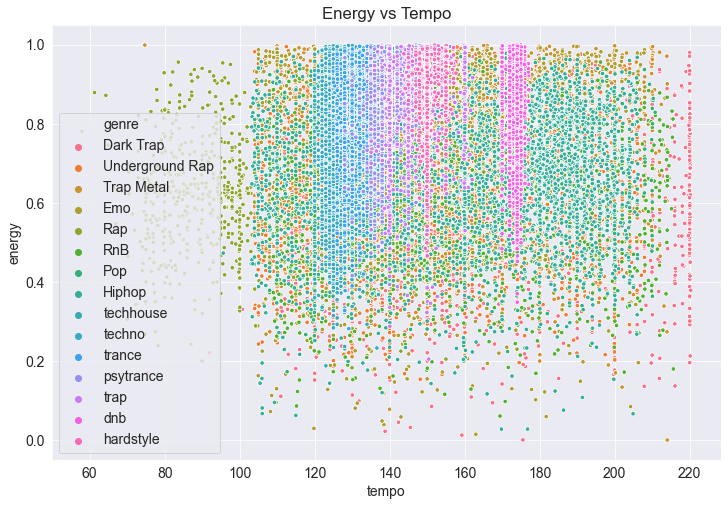

In [80]:
plt.figure(figsize = (12,8))
plt.title ("Energy vs Tempo")
sns.scatterplot(x='tempo', y='energy', hue='genre', data=spotify_data,s=20);

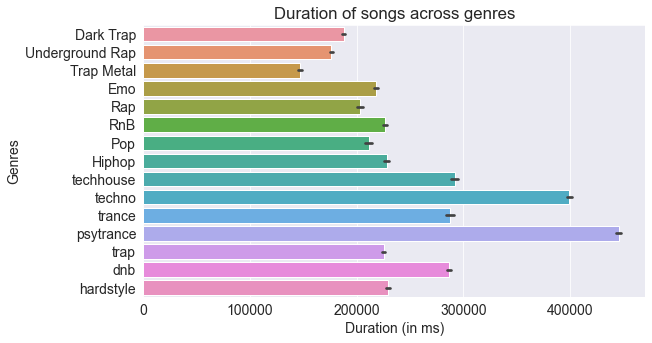

In [81]:
plt.title("Duration of songs across genres")
sns.color_palette("husl",15)
sns.barplot(y='genre', x='duration_ms', data=spotify_data)
plt.xlabel("Duration (in ms)")
plt.ylabel("Genres");

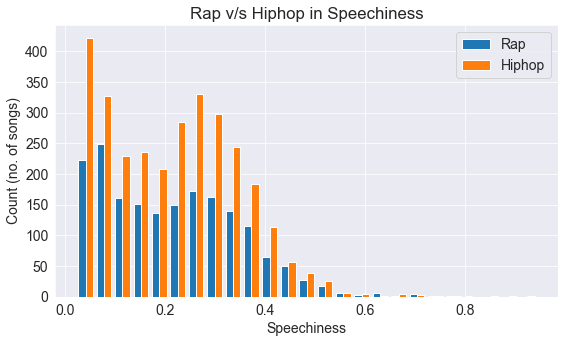

In [82]:
speech_test = spotify_data[["genre","speechiness"]]
Rap_speech_test = speech_test.groupby("genre").get_group("Rap")
Hiphop_speech_test = speech_test.groupby("genre").get_group("Hiphop")

plt.hist([Rap_speech_test.speechiness,Hiphop_speech_test.speechiness], bins=25,label=['Rap','Hiphop'])
plt.legend()
plt.xlabel('Speechiness')
plt.ylabel('Count (no. of songs)')
plt.title('Rap v/s Hiphop in Speechiness');

In [83]:
safe_songs = spotify_data[(59 < spotify_data.tempo) & (spotify_data.tempo < 81)]

safe_songs.groupby("genre")[["tempo"]].mean()


,tempo
genre,
Dark Trap,75.418000
Rap,76.397674
Trap Metal,74.716000


In [84]:
dance_genre = spotify_data.groupby("genre")[["loudness"]].mean().sort_values("loudness",ascending=False)
dance_genre

,loudness
genre,
trap,-2.725578
dnb,-4.063237
hardstyle,-4.349444
Emo,-5.433641
Pop,-5.632072
Trap Metal,-5.879087
psytrance,-6.703383
Rap,-6.887086
RnB,-6.899896


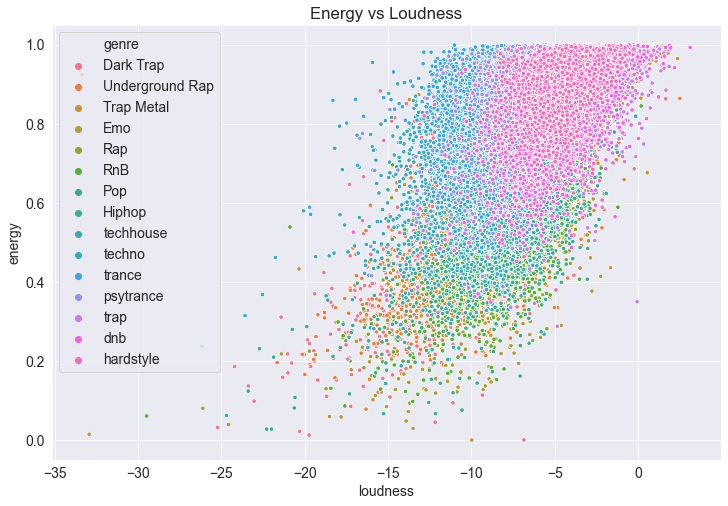

In [85]:
plt.figure(figsize = (12,8))
plt.title ("Energy vs Loudness")
sns.scatterplot(x='loudness', y='energy', hue='genre', data=spotify_data,s=20);

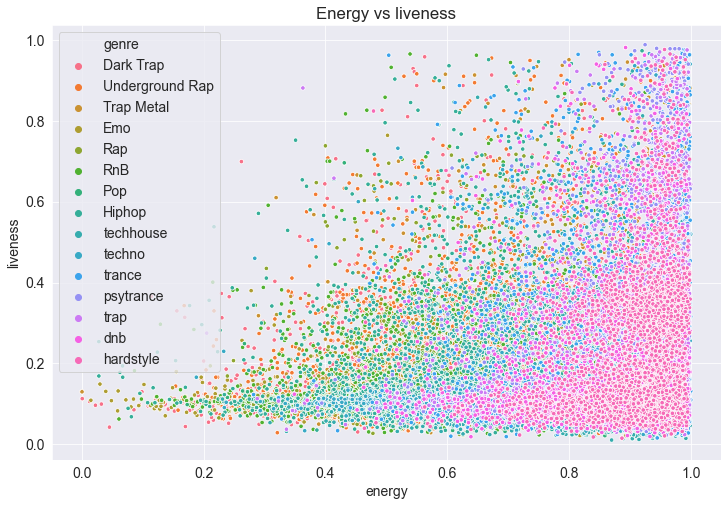

In [86]:
plt.figure(figsize = (12,8))
plt.title ("Energy vs liveness")
sns.scatterplot(y='liveness', x='energy', hue='genre', data=spotify_data,s=20);

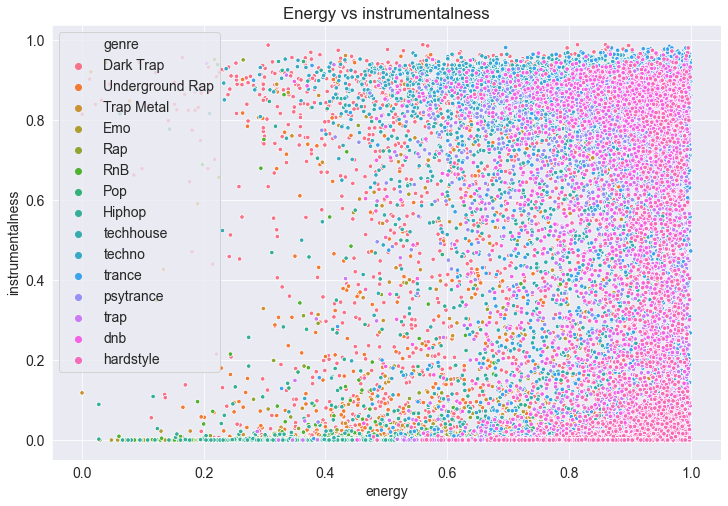

In [87]:

plt.figure(figsize = (12,8))
plt.title ("Energy vs instrumentalness")
sns.scatterplot(y='instrumentalness', x='energy', hue='genre', data=spotify_data,s=20);

In [88]:
speechiness_genre = spotify_data.groupby("genre")[["speechiness"]].mean().sort_values("speechiness",ascending=False)
speechiness_genre

,speechiness
genre,
Underground Rap,0.224992
Rap,0.217862
Hiphop,0.217150
Trap Metal,0.209677
trap,0.205966
RnB,0.143110
Dark Trap,0.123434
hardstyle,0.094624
Pop,0.088363


In [89]:
liveness_genre = spotify_data.groupby("genre")[["liveness"]].mean().sort_values("liveness",ascending=False)
liveness_genre

,liveness
genre,
trance,0.296976
psytrance,0.293434
trap,0.276127
hardstyle,0.273830
Trap Metal,0.243655
Hiphop,0.210581
dnb,0.202883
Emo,0.195243
Underground Rap,0.191116


In [90]:

acousticness_genre = spotify_data.groupby("genre")[["acousticness"]].mean().sort_values("acousticness",ascending=False)
acousticness_genre

,acousticness
genre,
RnB,0.225276
Hiphop,0.195569
Rap,0.170566
Underground Rap,0.162708
Dark Trap,0.159493
Pop,0.149251
Emo,0.143094
Trap Metal,0.114926
hardstyle,0.040841


In [91]:

valence_genre = spotify_data.groupby("genre")[["valence"]].mean().sort_values("valence",ascending=False)
valence_genre

,valence
genre,
techhouse,0.568175
Pop,0.550264
Hiphop,0.523628
RnB,0.493974
Underground Rap,0.444629
Emo,0.444145
Rap,0.440921
Trap Metal,0.348786
trap,0.301178


In [92]:
instrumentalness_genre = spotify_data.groupby("genre")[["instrumentalness"]].mean().sort_values("instrumentalness",ascending=False)
instrumentalness_genre

,instrumentalness
genre,
techno,0.847089
psytrance,0.766458
techhouse,0.580083
trance,0.495374
dnb,0.459998
Dark Trap,0.277276
trap,0.196289
hardstyle,0.137431
Trap Metal,0.057051


In [93]:
key_genre = spotify_data.groupby("genre")[["key"]].mean().sort_values("key",ascending=False)
key_genre

,key
genre,
psytrance,5.989531
techhouse,5.794622
hardstyle,5.710831
techno,5.698917
dnb,5.619016
Hiphop,5.553170
Pop,5.399132
trance,5.389797
Dark Trap,5.298384
